In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Heart.csv")
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
data=pd.get_dummies(data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
f=data.pop('HeartDisease')
data.insert(len(list(data)),'HeartDisease',f)
data

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0     40        140          289          0    172      0.0      0      1   
1     49        160          180          0    156      1.0      1      0   
2     37        130          283          0     98      0.0      0      1   
3     48        138          214          0    108      1.5      1      0   
4     54        150          195          0    122      0.0      0      1   
..   ...        ...          ...        ...    ...      ...    ...    ...   
913   45        110          264          0    132      1.2      0      1   
914   68        144          193          1    141      3.4      0      1   
915   57        130          131          0    115      1.2      0      1   
916   57        130          236          0    174      0.0      1      0   
917   38        138          175          0    173      0.0      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ...  ChestPainType_TA  \
0                    0                  1  ...                 0   
1                    0                  0  ...                 0   
2                    0                  1  ...                 0   
3                    1                  0  ...                 0   
4                    0                  0  ...                 0   
..                 ...                ...  ...               ...   
913                  0                  0  ...                 1   
914                  1                  0  ...                 0   
915                  1                  0  ...                 0   
916                  0                  1  ...                 0   
917                  0                  0  ...                 0   

     RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0                 0                  1              0                 1   
1                 0                  1              0                 1   
2                 0                  0              1                 1   
3                 0                  1              0                 0   
4                 0                  1              0                 1   
..              ...                ...            ...               ...   
913               0                  1              0                 1   
914               0                  1              0                 1   
915               0                  1              0                 0   
916               1                  0              0                 1   
917               0                  1              0                 1   

     ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0                   0              0              0            1             0  
1                   0              0              1            0             1  
2                   0              0              0            1             0  
3                   1              0              1            0             1  
4                   0              0              0            1             0  
..                ...            ...            ...          ...           ...  
913                 0              0              1            0             1  
914                 0              0              1            0             1  
915                 1              0              1            0             1  
916                 0              0              1            0             1  
917                 0              0              0            1             0  

[918 rows x 21 columns]

In [4]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred=clf.predict(x_test)

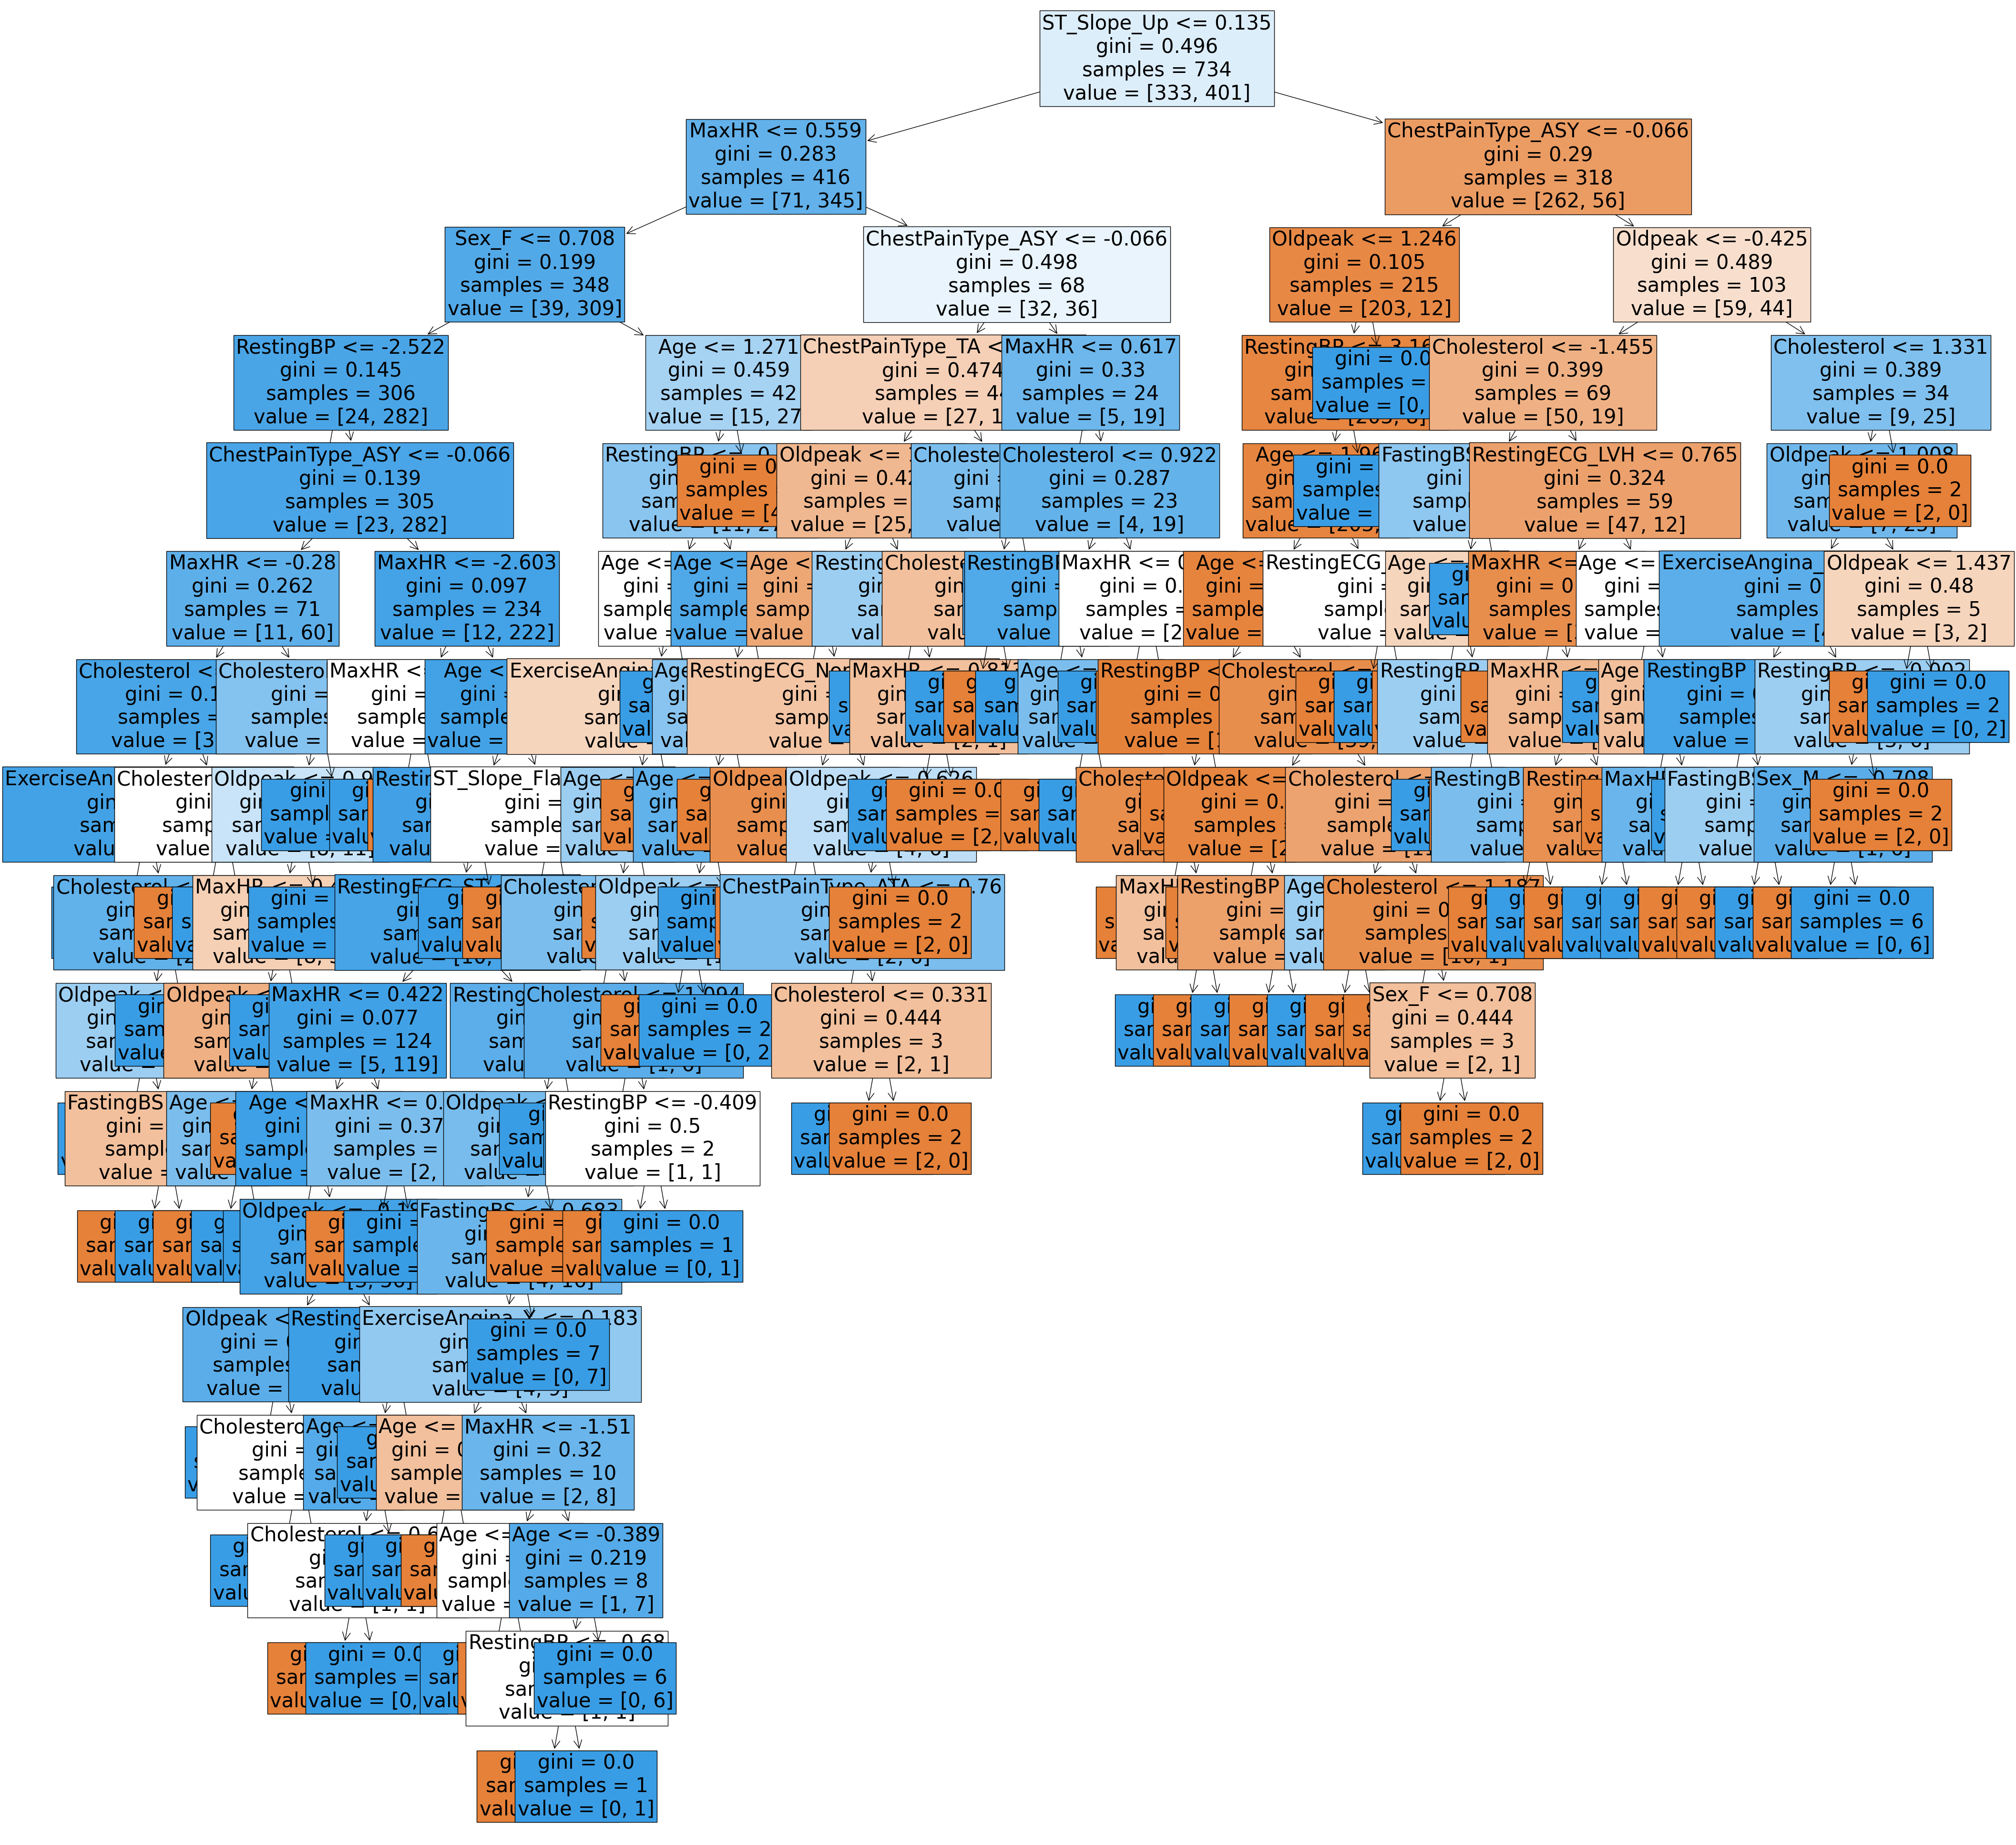

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(50,50))
tree.plot_tree(clf,feature_names=data.columns,fontsize=30,filled=True)
plt.show()

In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score= %.2f'%(accuracy_score(y_pred,y_test)*100))
print('Precision Score= %.2f'%(precision_score(y_pred,y_test)*100))
print('Recall Score= %.2f'%(recall_score(y_pred,y_test)*100))
print('F1 Score= %.2f'%(f1_score(y_pred,y_test)*100))

Accuracy Score= 76.09
Precision Score= 72.90
Recall Score= 83.87
F1 Score= 78.00


In [10]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred=clf.predict(x_test)

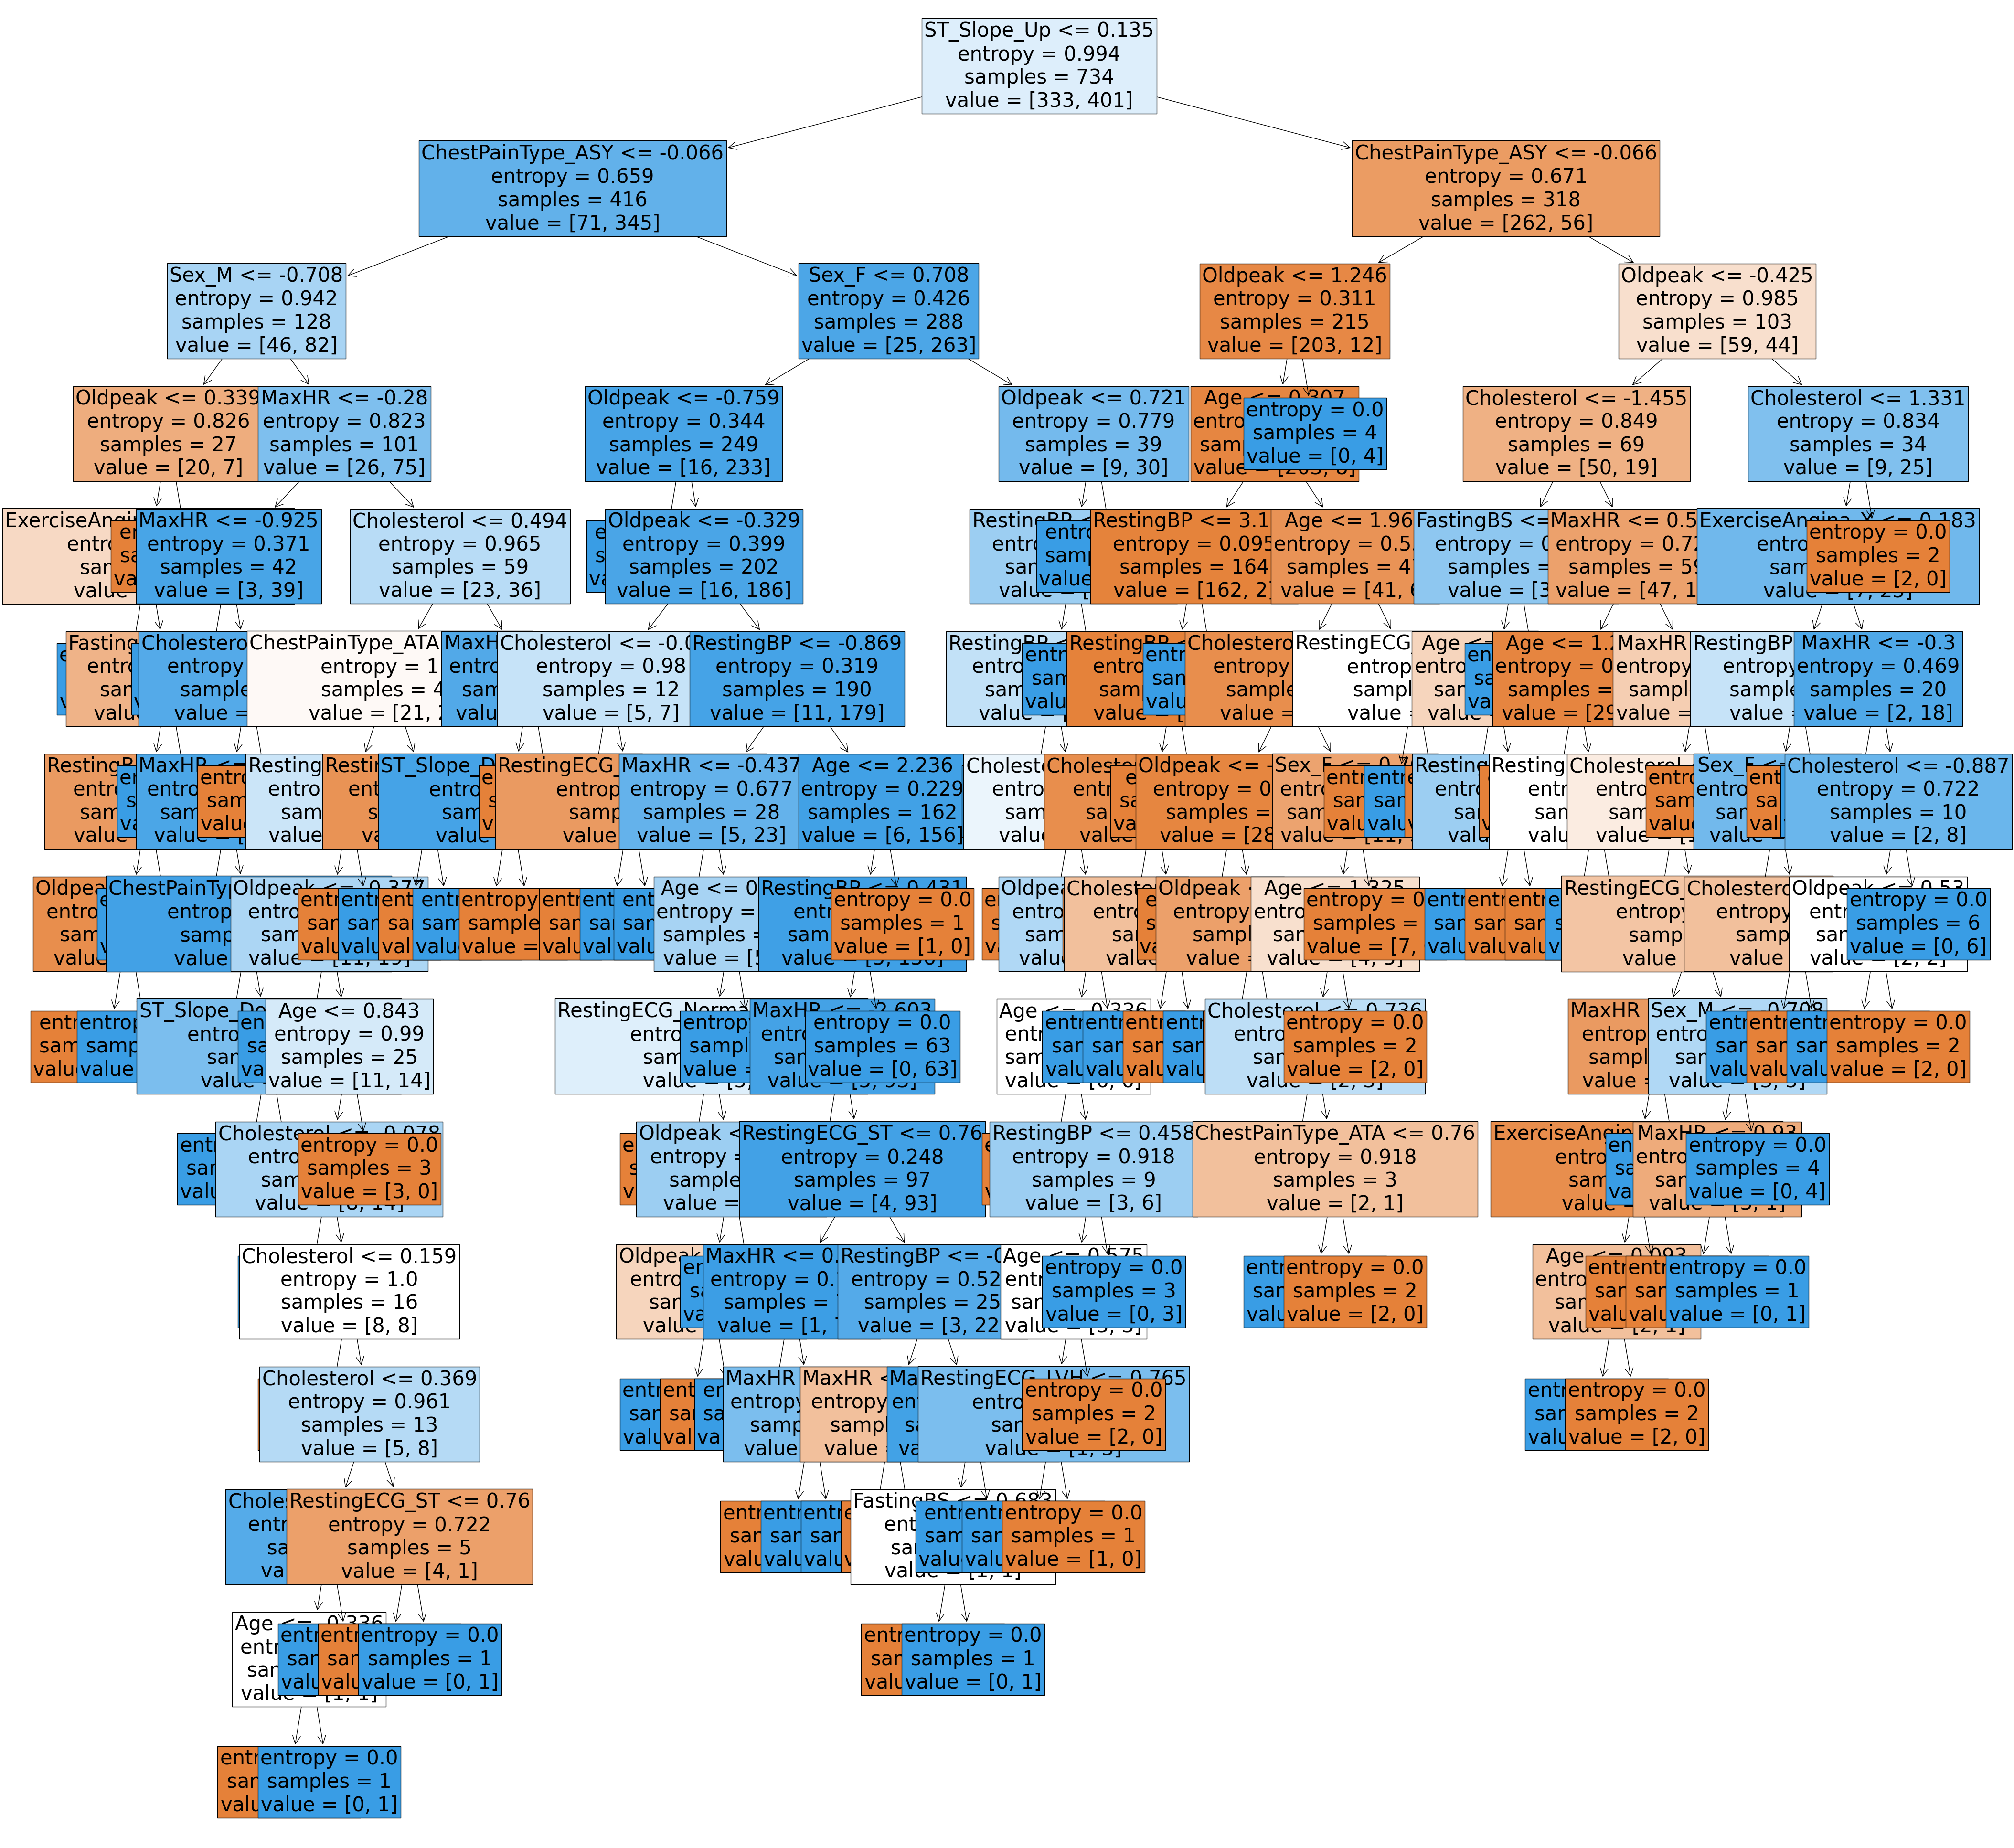

In [12]:
fig=plt.figure(figsize=(50,50))
tree.plot_tree(clf,feature_names=data.columns,fontsize=30,filled=True)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score= %.2f'%(accuracy_score(y_pred,y_test)*100))
print('Precision Score= %.2f'%(precision_score(y_pred,y_test)*100))
print('Recall Score= %.2f'%(recall_score(y_pred,y_test)*100))
print('F1 Score= %.2f'%(f1_score(y_pred,y_test)*100))

Accuracy Score= 75.54
Precision Score= 72.90
Recall Score= 82.98
F1 Score= 77.61
